# Challenge 1. Classification Machine Learning Model.

## 1. Data Handling & Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE,trustworthiness
from sklearn.preprocessing import StandardScaler

In [2]:
CSVMetaData = '../datasets/ACDC_radiomics.csv'
data=pd.read_csv(CSVMetaData)

## Dimensionality Reduction

### t-SNE

In [3]:
# Select only numerical features (excluding categorical ones like labels or IDs)
y = data["class"]
X = data.select_dtypes(include=[np.number])

# Standardize the data (zero mean and unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original data dimensions: {X.shape}")

Original data dimensions: (100, 644)


In [4]:
#tsne_default = fast_tsne(X_scaled, perplexity=30, seed=42)
def t_sne(n_components,perplexity):
    tsne = TSNE(n_components=n_components,perplexity=perplexity, random_state=42)
    tsne_default = tsne.fit_transform(X_scaled)
    #Trustworthiness of the low-dimensional space compared to the high dimensional space [0,1]
    Trst=trustworthiness(X_scaled, tsne_default)
    if Trst > 0.94:
        print(f"perplexity: {perplexity}, trustworthiness: {Trst}")

    # Convert t_SNE data into a DataFrame for visualization
    df_t_SNE = pd.DataFrame({
        "t_SNE_1": tsne_default[:,0],
        "t_SNE_2": tsne_default[:,1],
        "class": y.values
    })

    #Plot t-SNE results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="t_SNE_1", y="t_SNE_2", hue="class", data=df_t_SNE)
    plt.title(f"t-SNE, perplexity: {perplexity}")
    plt.legend()
    plt.show()


perplexity: 25, trustworthiness: 0.9442608695652174


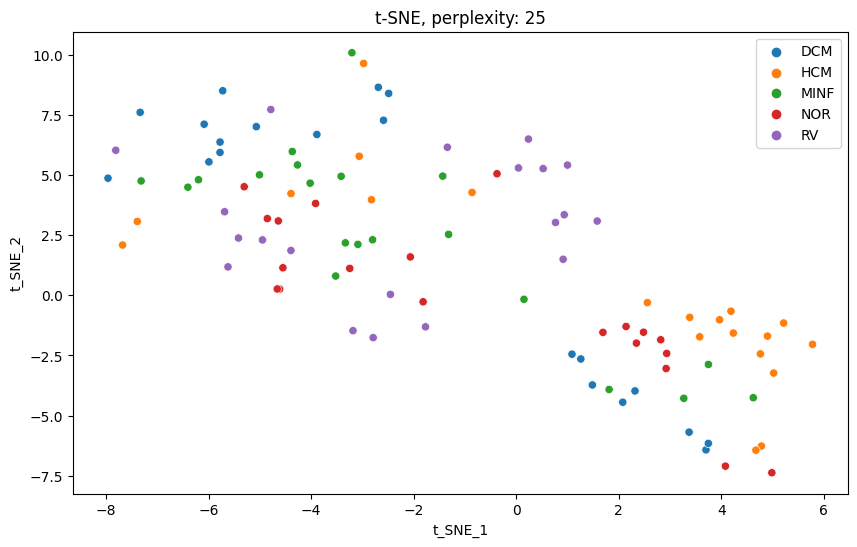

perplexity: 31, trustworthiness: 0.9408695652173913


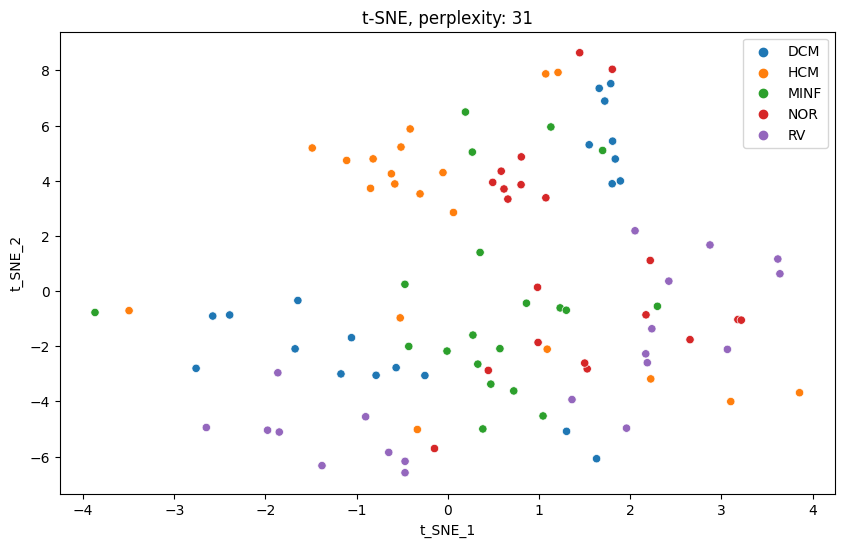

perplexity: 38, trustworthiness: 0.9453478260869566


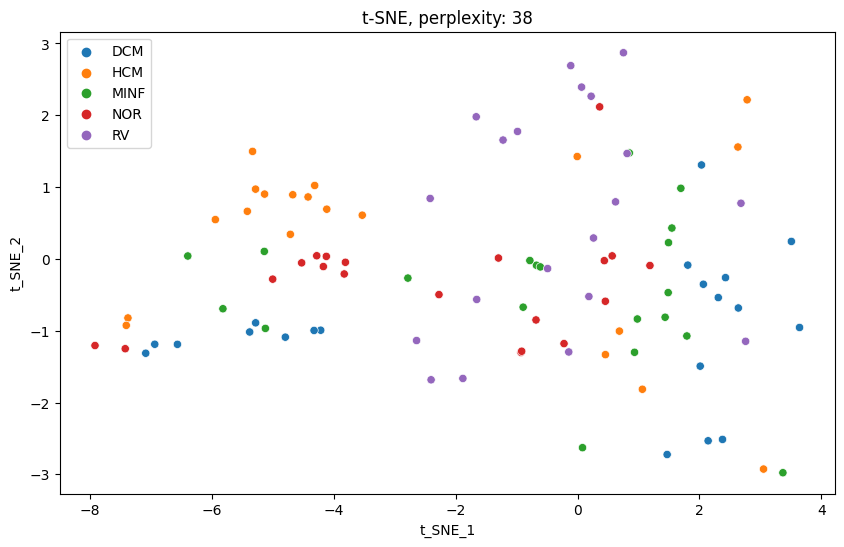

In [5]:
for i in [25,31,38]:
    t_sne(2,i)

In addition to testing with different perplexities, n_components were tested, however with more than 2 the trustworthiness decreased, so n_components=2, perplexity=38 was chosen.

In [6]:
tsne = TSNE(n_components=2,perplexity=38, random_state=42)
X_t_SNE = tsne.fit_transform(X_scaled)

In [7]:
# Save X_t_SNE n_components=2,perplexity=38
np.save("../datasets/X_t-SNE.npy", X_t_SNE)